# Lecture 08: Matrices (solution)

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/ce311k/blob/main/notebooks/lectures/08_matrices/08_matrices.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/ce311k/blob/main/notebooks/lectures/08_matrices/08_matrices_solutions.ipynb)

## Objectives

- Introduction to 2D arrays (matrices) 
- Manipulating arrays (indexing, slicing, etc)
- Apply elementary numerical operations

<iframe width="560" height="315" src="https://www.youtube.com/embed/dvg31s3n9nw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/3T35xoaUHUU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [1]:
import numpy as np

## Two-dimensional arrays

Two-dimensional arrays are very useful for arranging data in many engineering applications and for performing mathematical operations. Commonly, 2D arrays are used to represents matrices. To create the matrix

$$
A = 
\begin{bmatrix} 
2.2 & 3.7 & 9.1\\ 
-4 & 3.1 & 1.3
\end{bmatrix} 
$$

we use:

In [2]:
A = np.array([[2.2, 3.7, 9.1], [-4.0, 3.1, 1.3]])
print(A)

[[ 2.2  3.7  9.1]
 [-4.   3.1  1.3]]


If we check the length of `A`:

In [3]:
print(len(A))

2


it reports the number of rows. To get the shape of the array, we use:

In [4]:
print(A.shape)

(2, 3)


which reports 2 rows and 3 columns (stored using a tuple). To get the number of rows and the number of columns,

In [5]:
num_rows = A.shape[0]
num_cols = A.shape[1]
print("Number of rows is {}, number of columns is {}.".format(num_rows, num_cols))

Number of rows is 2, number of columns is 3.


We can 'index' into a 2D array using two indices, the first for the row index and the second for the column index:

In [6]:
A02 = A[0, 2]
print(A02)

9.1


With `A[1]`, we will get the second row:

In [7]:
print(A[1])

[-4.   3.1  1.3]


We can iterate over the entries of `A` by iterating over the rows, and then the entry in each row:

In [8]:
for row in A:
    print("-----")
    for c in row:
        print(c)

-----
2.2
3.7
9.1
-----
-4.0
3.1
1.3


In [9]:
nrows = A.shape[0]
ncols = A.shape[1]
#print(nrows, ncols)

for i in np.arange(nrows):
    print("----")
    print("Row: {}".format(i))
    print("----")
    for j in np.arange(ncols):
      print("row i = {} col j = {}: value: {}".format(i, j, A[i][j]))

----
Row: 0
----
row i = 0 col j = 0: value: 2.2
row i = 0 col j = 1: value: 3.7
row i = 0 col j = 2: value: 9.1
----
Row: 1
----
row i = 1 col j = 0: value: -4.0
row i = 1 col j = 1: value: 3.1
row i = 1 col j = 2: value: 1.3


> **Warning:** NumPy has a `numpy.matrix` data structure. Its use is not recommended as it behaves inconsistently in some cases.

### Transpose a matrix:

$$
A = 
\begin{bmatrix} 
2.2 & 3.7 & 9.1\\ 
-4 & 3.1 & 1.3
\end{bmatrix} 
$$


to 

$$
A^T = 
\begin{bmatrix} 
2.2 & -4\\ 
3.7 & 3.1 \\
9.1 & 1.3
\end{bmatrix} 
$$


$$ 
A^T[j][i] = A[i][j]
$$

In [10]:
A = np.array([[2.2, 3.7, 9.1], [-4.0, 3.1, 1.3]])
print("A= {}\n".format(A))
nrows = A.shape[0]
ncols = A.shape[1]

At = np.zeros((ncols, nrows))
for i in range(nrows):
    for j in range(ncols):
        At[j][i] = A[i][j]
print("At= {}\n".format(At))

A= [[ 2.2  3.7  9.1]
 [-4.   3.1  1.3]]

At= [[ 2.2 -4. ]
 [ 3.7  3.1]
 [ 9.1  1.3]]



In [11]:
A = np.array([[2.2, 3.7, 9.1], [-4.0, 3.1, 1.3]])
print("A= {}\n".format(A))

A= [[ 2.2  3.7  9.1]
 [-4.   3.1  1.3]]



In [12]:
At = np.transpose(A)
print("Transpose of A= {}\n".format(At))

Transpose of A= [[ 2.2 -4. ]
 [ 3.7  3.1]
 [ 9.1  1.3]]



### 2D array (matrix) operations

For those who have seen matrices previously, the operations in this section will be familiar. For those who have not encountered matrices, you might want to revisit this section once matrices have been covered in the mathematics lectures.

#### Matrix-vector and matrix-matrix multiplication

We will consider the matrix $A$:

$$
A  = 
\begin{bmatrix}
3 & 2 \\
1 & 4
\end{bmatrix}
$$

and the vector $x$:

$$
x  = 
\begin{bmatrix}
2 \\ -1
\end{bmatrix}
$$

In [13]:
A = np.array([[3, 2], [1, 4]])
print("Matrix A:\n {}".format(A))

x = np.array([2, 1])
print("Vector x:\n {}".format(x))

Matrix A:
 [[3 2]
 [1 4]]
Vector x:
 [2 1]


Doing it manually

In [14]:
print(A.shape)
print(x.shape)

(2, 2)
(2,)


In [15]:
# Create an empty array of zeros
y = np.zeros(x.shape)

for i in range(A.shape[0]): #Iterate through each row
    total = 0 
    for j in range(x.shape[0]):
        total += A[i][j]*x[j]
    y[i] = total

print(y)

[8. 6.]


We can compute the matrix-vector product $y = Ax$ by:

In [16]:
y = A.dot(x)
print(y)

[8 6]


### Compiling and running it faster

In [17]:
from numba import jit

#@jit
def MatVec(A, x):
    y = np.zeros(x.shape)
    for i in range(A.shape[0]): #Iterate through each row
        total = 0 
        for j in range(x.shape[0]):
            total += A[i][j]*x[j]
        y[i] = total
    return y

In [18]:
A = np.random.rand(5000, 5000)
x = np.random.rand(5000)

%time b = MatVec(A, x)

CPU times: user 12.2 s, sys: 18.4 ms, total: 12.2 s
Wall time: 12.3 s


In [19]:
%time b = A.dot(x)

CPU times: user 162 ms, sys: 0 ns, total: 162 ms
Wall time: 45.5 ms


### Matrix-matrix multiplication  

Computing $C = AB$, where $A$, $B$, and $C$ are all matrices, the approach is similar:

In [20]:
A = np.array([[3, 2], [1, 4]])

B = np.array([[1.3, 0], [0, 2.0]])

C = A.dot(B)
print(C)

[[3.9 4. ]
 [1.3 8. ]]


The inverse of a matrix ($A^{-1}$) and the determinant ($\det(A)$) can be computed using functions in the NumPy submodule `linalg`:

In [21]:
Ainv = np.linalg.inv(A)
print("Inverse of A:\n {}".format(Ainv))

Adet = np.linalg.det(A)
print("Determinant of A: {}".format(Adet))

Inverse of A:
 [[ 0.4 -0.2]
 [-0.1  0.3]]
Determinant of A: 10.000000000000002


> NumPy is large library, so it uses sub-modules to arrange functionality.

A very common matrix is the *identity matrix* $I$. We can create a $4 \times 4$ identity matrix using:

In [22]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Cross product

![Cross product](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Cross_parallelogram.png/685px-Cross_parallelogram.png)

In [23]:
a = np.array([2,3,4])
b = np.array([5,6,7])

c = np.cross(a, b)
print(c)

[-3  6 -3]


# Array slicing

When working with arrays, it is often useful to extract subsets of an array. We might want just the first 3 entries of a long array, or we might want the second column of a 2D array (matrix). These operations are known as *array slicing* (https://en.wikipedia.org/wiki/Array_slicing).

We will explore slicing through examples. We start by creating an array filled with random values:

In [24]:
x = np.array([1, 4, 6, 2, 3, 7])
print(x)

[1 4 6 2 3 7]


Below are some slicing operations:

In [25]:
# Using ':' implies the whole range of indices, i.e. from 0 -> (length-1)
y = x[:]
print("Slice using '[:]' {}".format(y))

# Using '1:3' implies indices 1 -> 3 (not including 3)
y = x[1:3]
print("Slice using '[1:3]': {}".format(y))

# Using '2:-1' implies indices 2 -> second-from-last
y = x[2:-1]
print("Slice using '[2:-1]': {}".format(y))

# Using '2:-2' implies indices 2 -> third-from-last
y = x[2:-2]
print("Slice using '[2:-2]': {}".format(y))

Slice using '[:]' [1 4 6 2 3 7]
Slice using '[1:3]': [4 6]
Slice using '[2:-1]': [6 2 3]
Slice using '[2:-2]': [6 2]


> Note the use of the index `-1`. The index `-1` corresponds to the last entry in the array, and `-2` the 
> second last entry, etc. This is convenient if we know how far in from the end of an array a desired entry is.
> By using negative indices we can express this without reference to the length of the array.

If we want a slice to run from the start of an array, or to the end of an array, we do: 

In [26]:
# Using ':3' implies start -> 3 (not including 3)
y = x[:3]
print("Slice using '[:3]': {}".format(y))

# Using '4:' implies 4 -> end
y = x[4:]
print("Slice using '[4:]': {}".format(y))

# Using ':' implies start -> end
y = x[:]
print("Slice using '[:]': {}".format(y))

Slice using '[:3]': [1 4 6]
Slice using '[4:]': [3 7]
Slice using '[:]': [1 4 6 2 3 7]


Slicing can be applied to 2D arrays:

In [27]:
B = np.array([[1.3, 0], [0, 2.0]])
print(B)

# Extract second row
r = B[1, :]
print(r)

[[1.3 0. ]
 [0.  2. ]]
[0. 2.]


There is more to array slicing syntax, for example it is possible to extract every 3rd entry. If you need to extract a sub-array, check first if you can do it using the compact array slicing syntax.

### Reading images as a 2D Array [Optional]


<class 'numpy.ndarray'>


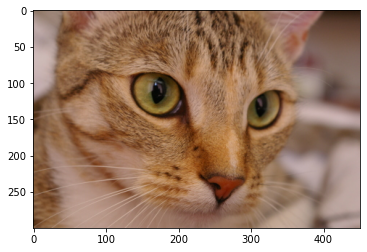

In [28]:
#!pip3 install scikit-image
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skimage import data, filters
cat = data.chelsea()
plt.imshow(cat)
print(type(cat))

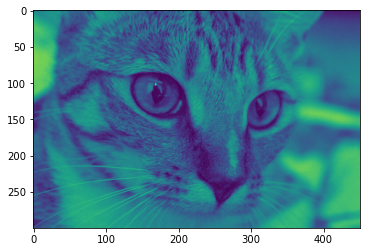

In [31]:
blue = cat[:,:,2]
plt.imshow(blue)

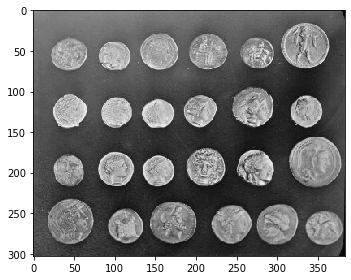

1 252


In [32]:
# Filtering images
from skimage import data, io, filters

image = data.coins()
io.imshow(image)
io.show()
print(np.min(image), np.max(image))

0.0 0.5897537590787858


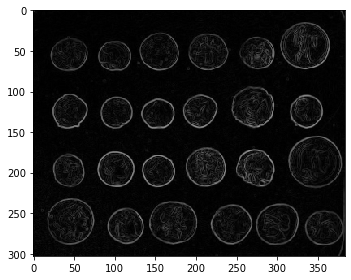

In [33]:
edges = filters.sobel(image)
print(np.min(edges), np.max(edges))
io.imshow(edges)
io.show()

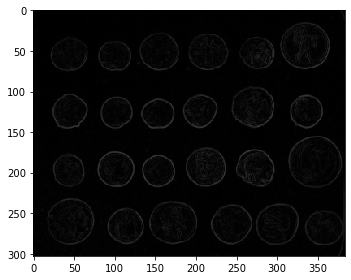

In [34]:
manual = edges/252*100
io.imshow(manual)
io.show()

$$g(i,j)=\alpha⋅f(i,j)+\beta$$

$\beta$ is Brightness

$\alpha$ is Contrast


[[0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]]
[[0.8 0.5 0.5 0.5 0.8]
 [0.5 0.8 0.5 0.8 0.5]
 [0.5 0.5 0.8 0.5 0.5]
 [0.5 0.8 0.5 0.8 0.5]
 [0.8 0.5 0.5 0.5 0.8]]


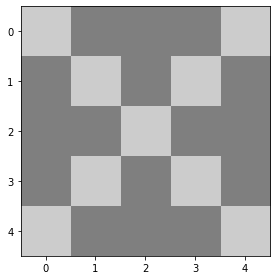

In [35]:
img = np.ones((5,5))
img.fill(0.5)
print(img)
for i in range(img.shape[0]):
    n = img.shape[0] - i -1
    img[i][i] = 0.8
    img[n][i] = 0.8
print(img)

io.imshow(img)

[[0.6 0.3 0.3 0.3 0.6]
 [0.3 0.6 0.3 0.6 0.3]
 [0.3 0.3 0.6 0.3 0.3]
 [0.3 0.6 0.3 0.6 0.3]
 [0.6 0.3 0.3 0.3 0.6]]


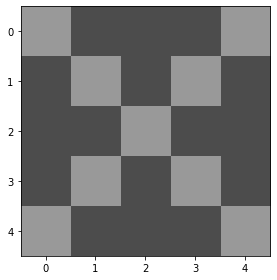

In [36]:
brighter_img = img - 0.2
print(brighter_img)
io.imshow(brighter_img)

[[4.  2.5 2.5 2.5 4. ]
 [2.5 4.  2.5 4.  2.5]
 [2.5 2.5 4.  2.5 2.5]
 [2.5 4.  2.5 4.  2.5]
 [4.  2.5 2.5 2.5 4. ]]


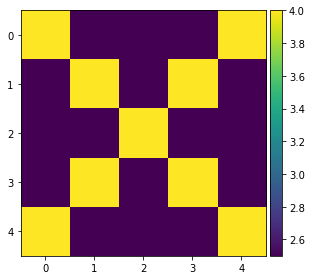

In [42]:
contrast_img = 5 * img
print(contrast_img)
io.imshow(contrast_img)

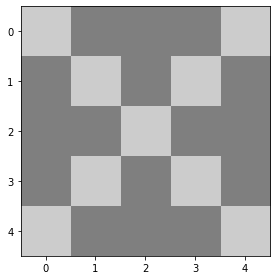

In [41]:
io.imshow(img)